In [12]:
!pip install pandas_datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 501.1 kB/s eta 0:00:001m706.6 kB/s eta 0:00:01


In [17]:
!pip install --update pandas-datareader


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --update


In [23]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 192.6 kB/s eta 0:00:001m228.9 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 kB 534.4 kB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 704.8 kB/s eta 0:00:001m862.3 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 kB 872.2 kB/s eta 0:00:000:00:01m eta 0:00:01
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
import datetime
from sklearn.metrics import mean_squared_error
import seaborn as sns
import yfinance as yf

In [4]:

btc_data = pd.read_csv('BTC-USD.csv')
btc_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-03-01,43194.503906,44793.601563,42952.585938,44354.636719,44354.636719,32479047645
1,2022-03-02,44357.617188,45077.578125,43432.851563,43924.117188,43924.117188,29183112630
2,2022-03-03,43925.195313,44021.578125,41914.750000,42451.789063,42451.789063,24967782593
3,2022-03-04,42458.140625,42479.613281,38805.847656,39137.605469,39137.605469,28516271427
4,2022-03-05,39148.449219,39566.335938,38777.035156,39400.585938,39400.585938,16975917450


In [8]:
df.Date = pd.to_datetime(df['Date'])

In [26]:
btc_data = yf.download(["BTC-USD"], start = datetime.datetime(2021,1,1), end = datetime.datetime(2023,2,28))
btc_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782


In [35]:
btc_data = yf.download(["BTC-USD"], start = datetime.datetime(2021,1,1), end = datetime.datetime(2023,2,28))['Close']

[*********************100%***********************]  1 of 1 completed


In [36]:
#preview
btc_data.head()

Date
2021-01-01    29374.152344
2021-01-02    32127.267578
2021-01-03    32782.023438
2021-01-04    31971.914062
2021-01-05    33992.429688
Name: Close, dtype: float64

In [37]:
#btc_
btc_data.to_csv("BTCData.csv")

In [38]:
# load as csv
df = pd.read_csv("BTCData.csv")
df.tail()


,Date,Close
783,2023-02-23,23947.492188
784,2023-02-24,23198.126953
785,2023-02-25,23175.375000
786,2023-02-26,23561.212891
787,2023-02-27,23522.871094


In [39]:
# convert date to datetime
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

In [40]:
# set date as index
df.index = df["Date"]

In [41]:
df.head()

,Date,Close
Date,,
2021-01-01,2021-01-01,29374.152344
2021-01-02,2021-01-02,32127.267578
2021-01-03,2021-01-03,32782.023438
2021-01-04,2021-01-04,31971.914062
2021-01-05,2021-01-05,33992.429688


In [42]:
del df["Date"]

In [43]:
df.head()

,Close
Date,
2021-01-01,29374.152344
2021-01-02,32127.267578
2021-01-03,32782.023438
2021-01-04,31971.914062
2021-01-05,33992.429688


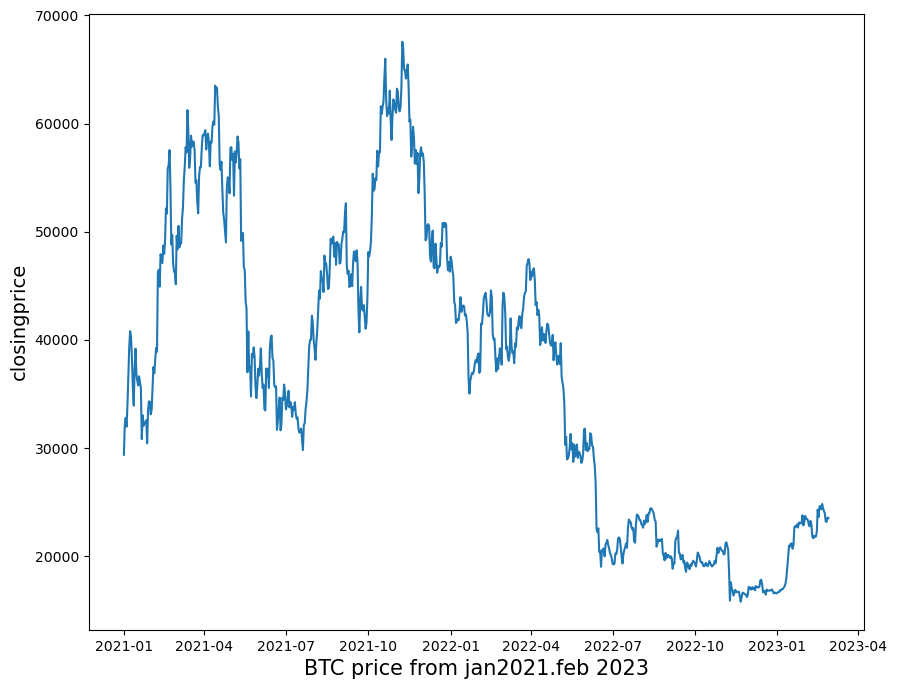

In [51]:
#visualize
ax, bar = plt.subplots(figsize=(10,8))
bar = sns.lineplot(x=df.index, y=df['Close'])
bar.set_ylabel('closingprice', fontsize=14)
bar.set_xlabel('BTC price from jan2021.feb 2023', fontsize=15)
plt.show()

In [ ]:
#splitting the data
train = df[df.index < pd.todatetime("", format='%Y-%m-%d')]
test = df[df.index > pd.todatetime("", format='%Y-%m-%d')]

#visualize
ax, bar = plt.subplots(figsize=())

In [52]:
#import the arima model
from statsmodels.tsa.statspace.sarimax import sarimax

ModuleNotFoundError: No module named 'statsmodels.tsa.statspace'